# Today's Session (07/13/2023):
Mohammad Mehrabi
mehrabim@marshall.usc.edu

## Introduction to convex analysis
#### convex sets, convex functions, properties of convex functions
## Introduction to convex analysis with cvxpy
#### CVXP: installation and background
#### Solve optimzation problems with cvxpy
#### A toy examples
### Portfolio allocation problem




==============================================
## Introduction to Convex analysis

Great resource for convex optimization: https://web.stanford.edu/~boyd/cvxbook

### Convex sets: 
See pages 16-25 of https://web.stanford.edu/~boyd/cvxbook/bv_cvxslides.pdf
### Convex functions:
See pages 39-42 of https://web.stanford.edu/~boyd/cvxbook/bv_cvxslides.pdf
### Convext optimization problems:
See pages 70,71,72,76 of https://web.stanford.edu/~boyd/cvxbook/bv_cvxslides.pdf
#### Linear and quadratic programms: 
See pages 86,87,91, 92 of https://web.stanford.edu/~boyd/cvxbook/bv_cvxslides.pdf



==============================================
# CVXPY
You can use CVXR in R, and CVX in Matlab. We use CVXPY for python.
## Installation: 
Insert "pip install cvxpy" in terminal on mac
1) Import cvxpy
2) determine the variables with cp.Variable(n), here n=#variables
3) determine the objective:   objective = cp.Minimize(function of variables)
4) determine the constraints:  constraints = [
 condition 1 on variables ,
 condition 2 on variables
]

5) define the problem:   problem=cp.Problem(objective, constraints)
6) solve the problem:    problem.solve()



==========
## A  toy example
$$
\text{min }(x-2)^2+(y-3)^2\\
\text{ Such that } \\ 
x+y\geq 6\\ x-y\leq 1 \\
$$

In [6]:
import cvxpy as cp

# Define the variables
x = cp.Variable()
y = cp.Variable()

# Define the parameters
a = 2
b = 3

# Define the objective function
objective = cp.Minimize(cp.square(x - a) + cp.square(y - b))

# Define the constraints
constraints = [
    x + y >= 6,
    x - y <= 1
]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Print the optimal solution
print("Optimal value of x:", x.value)
print("Optimal value of y:", y.value)
print("Optimal objective value:", problem.value)




Optimal value of x: 2.5
Optimal value of y: 3.5
Optimal objective value: 0.5


In [7]:
problem.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jul 11 05:33:29 PM: Your problem has 2 variables, 2 constraints, and 0 parameters.
(CVXPY) Jul 11 05:33:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 11 05:33:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 11 05:33:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 11 05:33:29 PM: Using cached ASA map, for faster compilation (bypassing reduction chain).
(CVXPY) Jul 11 05:33:29 PM: Finished problem compilation (took 

0.4999999999999982

## CVXPY functions
A great resource: https://www.cvxpy.org/tutorial/functions/index.html


# Portfolio  allocation example
We are given a set of $n$ stocks, each with a projected return $r_i \in [0, 1]$ (these stocks have been short-listed from a larger set and all have positive projected returns). Stock $i$ has a purchasing cost $c_i$, and the overall budget is denoted as $B$. We assume that the projected returns are $\textit{independent}$ random variables with variance $v_i = \text{Var}(r_i)$.

The objective is to allocate the budget among the stocks by finding allocation weights $w_i$ such that the overall variance is minimized, aiming to reduce the risk. However, we also want to ensure that the profit remains close to investing the entire budget in the stock with the highest projected return (let's say it is at least $\alpha=0.8$ of this scenario).

To solve this problem, we can use the CVXPY optimization framework. By formulating the objective function and constraints, we can find the optimal allocation weights that minimize the overall variance while satisfying the budget and allocation constraints.

It can be formulated as
$$
\min  \sum\limits_{i=1:n} w_i^2 v_i\\
\text{s.t } \sum_{i=1:n} w_i=1\\
w_i\geq 0, \forall i\in [n]\\
 \sum_{i=1:n}w_i r_i\geq \alpha \cdot \max\{r_i: i=1:n\}\\
$$

In [82]:
#generate dataset
np.random.seed(42) #to make this experiment reproducible
n=200 #number of stocks
r=np.random.uniform(size=n) #retun values
v=5*r**2+np.random.normal(loc=3,scale=1, size=n) #variance values
c=-200*np.log((1-r))+np.random.normal(loc=1000,scale=100, size=n) #cost values
B=10000 ## budget
alpha=0.8 ## loose at most 20 percent of greedy allocation

dataset = np.column_stack((r, v, c))
id_column = np.arange(1, dataset.shape[0]+1)  # Generate IDs starting from 1
dataset_with_id = np.insert(dataset, 0, id_column, axis=1)

# export dataset
column_names = ['ID', 'Return', 'Variance', 'Cost']
dataset_final = np.row_stack((column_names, dataset_with_id))
np.savetxt('dataset_final.csv', dataset_final, delimiter=',', fmt='%s')

In [83]:
#import dataset
import pandas as pd

# Read the CSV file
df = pd.read_csv('dataset_final.csv')

# Extract specific columns
r = df['Return']
v = df['Variance']
c = df['Cost']

Investigate the relation between returns and their variance: 

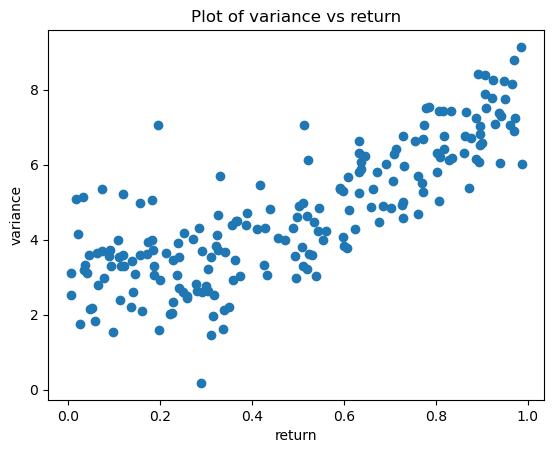

In [58]:
import matplotlib.pyplot as plt
plt.scatter(r, v)
plt.xlabel('return')
plt.ylabel('variance')
plt.title('Plot of variance vs return')
plt.show()

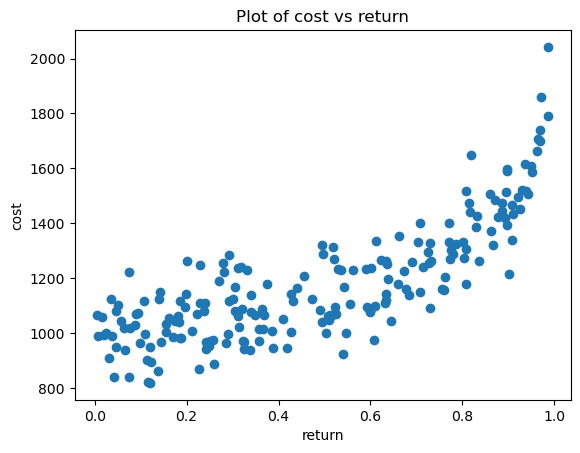

In [59]:
import matplotlib.pyplot as plt
plt.scatter(r, c)
plt.xlabel('return')
plt.ylabel('cost')
plt.title('Plot of cost vs return')
plt.show()

In [65]:
import cvxpy as cp

# Define the variables
w = cp.Variable(n)

objective = cp.Minimize(cp.square(w)*v)

# Define the constraints
constraints = [
 cp.sum(w)==1,
 w>=0,
 cp.sum(w*c)<=B ,  
 cp.sum(w*r)>=alpha*cp.max(r)  
]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve(verbose=True)



                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jul 11 06:29:03 PM: Your problem has 200 variables, 4 constraints, and 0 parameters.
(CVXPY) Jul 11 06:29:03 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 11 06:29:03 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 11 06:29:03 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 11 06:29:03 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jul 11 06:29:03 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffin

/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7 times so far.

  warnings.warn(msg, UserWarning)
/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 8 times so far.

  warnings.warn(

0.07062732250404091

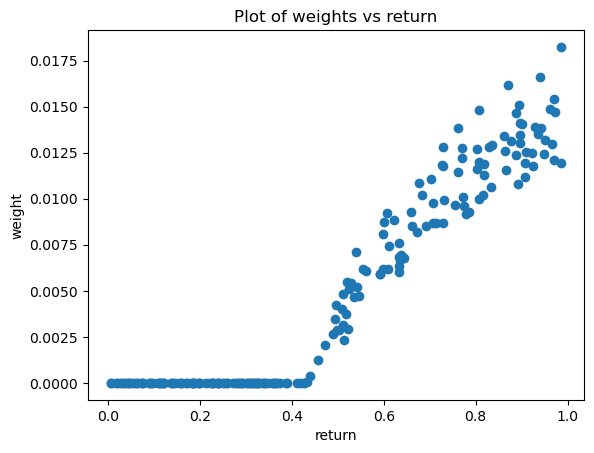

In [70]:
optimal_w = w.value
plt.scatter(r, optimal_w)
plt.xlabel('return')
plt.ylabel('weight')
plt.title('Plot of weights vs return')
plt.show()

# How to select optimal $\alpha$ 
We swipe $\alpha$ from 0 to 1 and observe the expected risk values and associated variance.

In [108]:
N_exp=100
results=[]
results2=[]
for alpha in np.linspace(0, 1, N_exp):
    print(alpha)
    w = cp.Variable(n)
    objective = cp.Minimize(cp.square(w)*v)
    constraints = [
        cp.sum(w)==1,
        w>=0,
        cp.sum(w*c)<=B ,  
        cp.sum(w*r)>=alpha*np.max(r)  
    ]
    problem = cp.Problem(objective, constraints)
    problem.solve(verbose=False)
    results.append(np.sum(np.square(w.value)*v))
    results2.append(np.sum(w.value*r))
    
    

0.0
0.010101010101010102
0.020202020202020204
0.030303030303030304
0.04040404040404041
0.05050505050505051
0.06060606060606061
0.07070707070707072
0.08080808080808081
0.09090909090909091
0.10101010101010102
0.11111111111111112
0.12121212121212122
0.13131313131313133
0.14141414141414144
0.15151515151515152
0.16161616161616163
0.17171717171717174
0.18181818181818182
0.19191919191919193
0.20202020202020204
0.21212121212121213
0.22222222222222224


/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7218 times so far.

  warnings.warn(msg, UserWarning)
/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7219 times so far.

  warnings

0.23232323232323235
0.24242424242424243
0.25252525252525254
0.26262626262626265
0.27272727272727276
0.2828282828282829
0.29292929292929293
0.30303030303030304
0.31313131313131315
0.32323232323232326
0.33333333333333337
0.3434343434343435
0.3535353535353536
0.36363636363636365
0.37373737373737376
0.38383838383838387
0.393939393939394
0.4040404040404041
0.4141414141414142
0.42424242424242425
0.43434343434343436
0.4444444444444445
0.4545454545454546
0.4646464646464647


/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7290 times so far.

  warnings.warn(msg, UserWarning)
/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7291 times so far.

  warnings

0.4747474747474748
0.48484848484848486
0.494949494949495
0.5050505050505051
0.5151515151515152
0.5252525252525253
0.5353535353535354
0.5454545454545455
0.5555555555555556
0.5656565656565657
0.5757575757575758
0.5858585858585859
0.595959595959596
0.6060606060606061
0.6161616161616162
0.6262626262626263
0.6363636363636365
0.6464646464646465
0.6565656565656566
0.6666666666666667
0.6767676767676768
0.686868686868687
0.696969696969697


/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7362 times so far.

  warnings.warn(msg, UserWarning)
/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7363 times so far.

  warnings

0.7070707070707072
0.7171717171717172
0.7272727272727273
0.7373737373737375
0.7474747474747475
0.7575757575757577
0.7676767676767677
0.7777777777777778
0.787878787878788
0.797979797979798
0.8080808080808082
0.8181818181818182
0.8282828282828284
0.8383838383838385
0.8484848484848485
0.8585858585858587
0.8686868686868687
0.8787878787878789
0.888888888888889


/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7428 times so far.

  warnings.warn(msg, UserWarning)
/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7429 times so far.

  warnings

0.8989898989898991
0.9090909090909092
0.9191919191919192
0.9292929292929294
0.9393939393939394
0.9494949494949496
0.9595959595959597
0.9696969696969697
0.9797979797979799
0.98989898989899
1.0


/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7485 times so far.

  warnings.warn(msg, UserWarning)
/Users/mohammadmehrabi/anaconda3/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7486 times so far.

  warnings

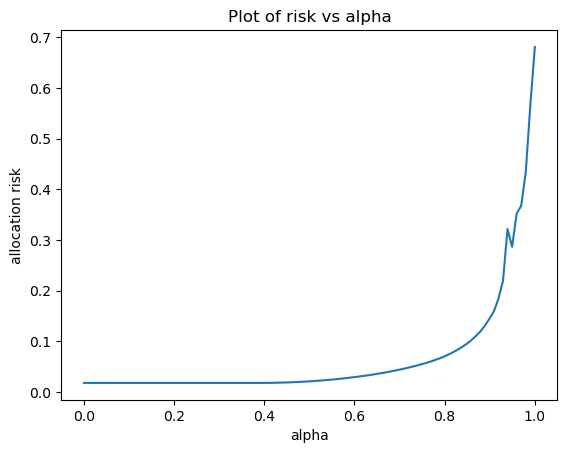

In [106]:
plt.plot(np.linspace(0, 1, N_exp), results)
plt.xlabel('alpha')
plt.ylabel('allocation risk')
plt.title('Plot of risk vs alpha')
plt.show()

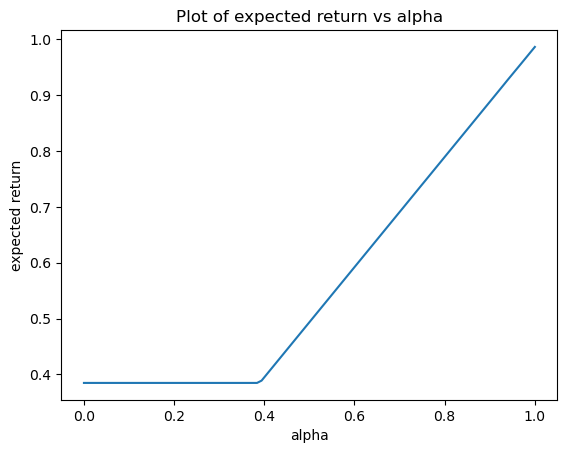

In [110]:
plt.xlabel('alpha')
plt.ylabel('expected return')
plt.title('Plot of expected return vs alpha')
plt.plot(np.linspace(0, 1, N_exp), results2)
plt.show()

# Conclusion
In conclusion, this study has provided insights into CVX sets and functions, as well as their properties. We have also gained a comprehensive understanding of the general structure of CVX optimization problems, which can often be solved efficiently. Moreover, we have learned how to define and formulate CVX optimization problems within the CVX package environment using the CVXPY package.

Through a synthetic example, we have witnessed the power and effectiveness of CVX optimization problems. The ability to model and solve complex optimization tasks using CVX has been showcased, highlighting its potential for various real-world applications.
